In [55]:
from sympy import Rational as R
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import expon
from scipy.stats import geom
import math
import statsmodels.api as sm
from scipy import stats
import numpy as np
from sympy import *
import sympy as sp
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sympy import Rational as R
from IPython.display import display, Latex, HTML, Math
x, y, z, u, c = symbols('x y z u c')
init_printing()
%matplotlib inline

### Assignment 1

To find the correct hypothesis always consider the alternative hypothesis. We are looking for "or not" so we would get "!=" in the alternative:

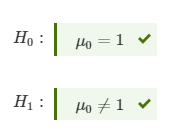

In [6]:
# Test statistic. We use t-dsitribution since the sample is small
a = [-1.7, 2.2, 3.2, -0.8, 2.0, 0.7, -2.2, 0.5, 3.0]
param = stats.ttest_1samp(a, 1)
test_stat = abs(round(param[0], 7))
test_stat

0.3505482

In [11]:
# The critical value using alpha = 0.1
crit = abs(round(stats.t.ppf(0.1/2,len(a)-1), 4))
crit

1.8595

### Assignment 2

As before, always look at the alternative hypothesis. The information that is of interest is "If the difference in the reduced time delay is less than 1 minute" - this want we want to prove. So we want the difference of before and after to be less than one - so we state this as the alternative and the "opposite" as the null:

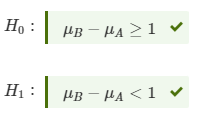

### Assignment 3

In [24]:
# Since all the probabilities are "=" we use PMF, and since there is an "or" we use Union rule and since X and Y are
# independent P(X and Y) = P(X)*P(Y)
poisson.pmf(1, 2)+geom.pmf(1, 1/3)-poisson.pmf(1, 2)*geom.pmf(1, 1/3)

0.5137803776488169

For the next one we notice that the condition is X + Y = 1. We know that X is Poisson so X is "number of.." and Y is Geometric so it is "trials until first succes" - we may conclude that none of these can be negative. We get that X + Y = 2 gives the following option: X = 0, Y = 2 ; X = 1, Y = 1 ; X = 2, Y = 2. The formula for conditional is:

$$ P(A | B) = \frac{P(A \cap B)}{P(B)}$$

Using our notation:
$$
P(Y=2 \mid X+Y=2) = \frac{P(Y=2 \cap X+Y=2)}{P(X+Y=2)}
$$

Now, the numerator can be reduced since if $P(Y=2)$ and $P(X+Y = 2)$ must both be true then the latter means that $X = 0$ and $Y=2$. We get:

$$
P(Y=2 \mid X+Y=2) = \frac{P(Y=2)\times P(X=0)}{P(X = 0, Y = 2)\times P(X = 1, Y = 1) \times P(X = 2, Y = 2)}
$$


In [29]:
p = 1/3
num = geom.pmf(2, p)*poisson.pmf(0,2)
den = poisson.pmf(1, 2)*geom.pmf(1, p)+poisson.pmf(2, 2)*geom.pmf(0, p)+poisson.pmf(0, 2)*geom.pmf(2, p)
R(round(num/den, 4))

1/4

In [34]:
# E[X + Y] = E[X] + E[Y]
EX = geom.mean(p)
EY = poisson.mean(2)
EX + EY

5.0

The next one, $E[(X+Y)^2]$ can be obtained in a couple of ways. First using expansion:

$$E[(X+Y)^2] = E[X^2] + E[Y^2] + 2E[X]E[Y] = \operatorname{Var}(X)+E(X)^{2} + \operatorname{Var}(Y)+E(Y)^{2} + 2E[X]E[Y]$$

So you would need to find the variance of $X$ and $Y$ which is quite easy (in python: .var()). You could also do:

$$E[(X+Y)^2] = \operatorname{Var}(X+Y)+E[(X+Y)]^{2}$$

Noting that X and Y are independent (and thus their covariance is 0):

$$
\operatorname{Var}(X+Y) = \operatorname{Var}(X)+\operatorname{Var}(Y)+2 \operatorname{Cov}(X, Y) = \operatorname{Var}(X)+\operatorname{Var}(Y)
$$

we get

$$E[(X+Y)^2] = \operatorname{Var}(X)+\operatorname{Var}(Y) + E[(X+Y)]^{2}$$

In [38]:
# Using the first one
VarX = geom.var(p)
VarY = poisson.var(2)
display(Math(r'E\left[(X+Y)^{2}\right] = '  +latex(VarX + EX**2 + VarY + EY**2 + 2*EX*EY))) 

# Using the second one
display(Math(r'E\left[(X+Y)^{2}\right] = '  +latex(VarX + VarY + (EX+EY)**2))) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Assignment 4

In [40]:
## a
def F(x):
    return x**3

(1-F(4/5))/(1-F(1/2))

## Note that X > 4/5 is a subset of X > 1/2

0.5577142857142856

In [43]:
# b
f = diff(F(x))

sp.integrate(x*f, (x, 0, 1))

3/4

### Assignment 5

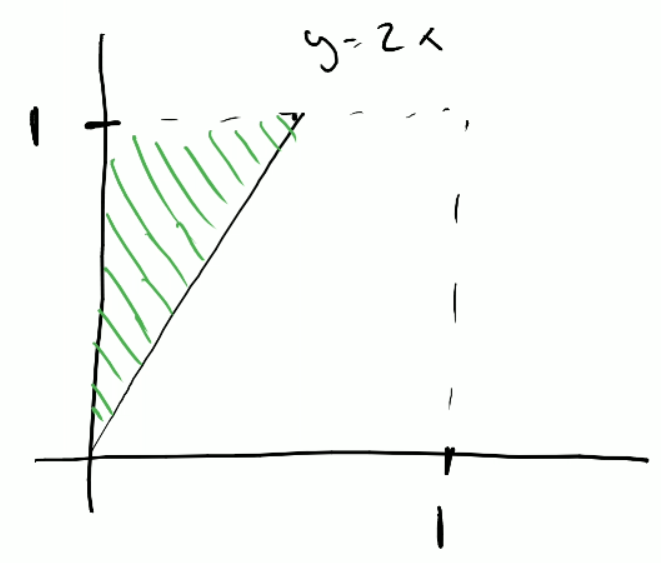

In [45]:
sp.integrate(1, (x, 0, y/2), (y, 0, 1))

1/4

### Assignment 6

$$
\begin{aligned}
0 &=\operatorname{cov}(2 X-Y, X+Y)=2 \operatorname{cov}(X, X+Y)-\operatorname{cov}(Y, X+Y)=2(\operatorname{cov}(X, X)+\operatorname{cov}(X, Y))-(\operatorname{cov}(x, Y)+\operatorname{cov}(Y, Y)) \\
&=2 \sigma_{X}^{2}+2 \operatorname{cov}(X, Y)-\operatorname{cov}(X, Y)-\sigma_{Y}^{2} \Rightarrow \operatorname{cov}(X, Y)=\sigma_{Y}^{2}-2 \sigma^{2} X=9-8=1
\end{aligned}
$$

We get
$$
\rho(X, Y) = \frac{\operatorname{cov}(X, Y)}{\sqrt{\sigma^{2} x \cdot \sigma^{2} Y}}=\frac{1}{\sqrt{4 \cdot 9}}=\frac{1}{6}
$$


### Assignment 7

In [51]:
# a)
P = Matrix([[0.5,0.2,0.3],[0.4,0.5,0.1],[0.25,0.25,0.5]])
(P**2)[0,2]

0.320000000000000

In [59]:
# b)
Xt = P.T

X = (Xt-eye(P.shape[0]))[0:-1,:].row_join(zeros(P.shape[0]-1,1)).col_join(ones(1,P.shape[0]+1))
round(X.rref()[0][0,-1], 2)

### Assignment 8

In [66]:
std = 1
z = stats.norm.ppf(0.975)
E = 0.4
n = (z*std / E)**2
math.ceil(n)

### Assignment 9

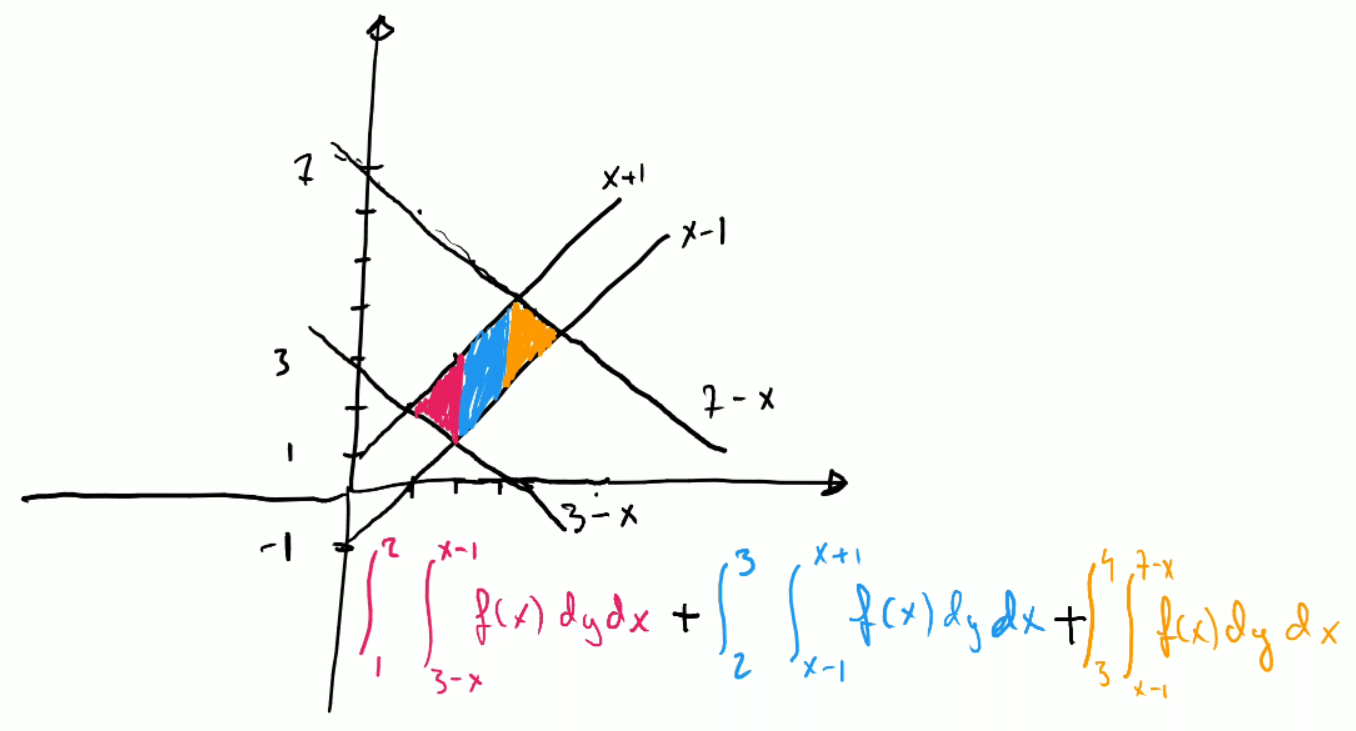

In [71]:
f = c*x*y
solve(sp.integrate(f, (y, 3-x, x+1), (x, 1, 2)) + sp.integrate(f, (y, x-1, x+1), (x, 2, 3))
+sp.integrate(f, (y, x-1, 7-x), (x, 3, 4))-1, c)[0]

### Assignment 10

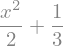

In [85]:
fxy = R(1,2)*x**2+R(2,3)*y
fx = sp.integrate(fxy, (y, 0, 1))
fx

In [87]:
fx_0 = R(1,3)
fy_x0 = R(2,3)*y / fx_0
fy_x0

In [88]:
sp.integrate(y*fy_x0, (y, 0, 1))

### Assignment 11

In [99]:
# a) Negative binomial. x = no. of success; p = prob. of succes. EX = r/p
x = 4
p = R(3,10)
Ex = x/p
Ex

# NOTE: don't use stats.nbinom.mean(n,p) - it's confusing
# The following gives you the right result, though stats.nbinom.mean(4, 0.3, loc = 4)

In [101]:
# b) Binomial
display(Math(r'P(X > 5) = '+ latex(stats.binom.sf(5, 15, 3/10))))

<IPython.core.display.Math object>

### Assignment 12

In [104]:
# a)
x = np.array([0.93,0.47,0.26,0.16,0.74,0.93,0.36,0.48,0.49,0.84,0.77,0.97])
y = np.array([8.56,5.98,6.83,5.26,7.51,8.41,6.72,6.82,5.14,7.56,6.64,9.78])
n = np.size(x)

x_mean = np.mean(x)
y_mean = np.mean(y)

Sxy = np.sum(x*y)-n*x_mean*y_mean
Sxx = np.sum(x*x)-((np.sum(x))**2)/n
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
display(Math(r'$$\hat{\beta}_{1} $$= ' + repr(round(b1, 4))))

<IPython.core.display.Math object>

In [108]:
# b)
level = 0.95
t_score = stats.t.ppf(((1-level)/2),(n-2))

x1 = sm.add_constant(x)
model = sm.OLS(y, x1).fit()
res = model.resid
yhat = model.fittedvalues

SSe = np.sum((y-yhat)**2)    # residual sum of squares (unexplained deviation)
varhat = SSe/(n-2)           # variance of x

ErrorSlope = t_score*math.sqrt((varhat/Sxx))
display(b1-abs(ErrorSlope), b1 + abs(ErrorSlope))